# NBA Statistics Exploration
### Bill, James, and Keenan
______

We entered this project with only one thing in mind, we all liked basketball and wanted to do something cool. The game of basketball has gotten increasingly data-driven in the last couple of years, with companies like SportsVU tracking player movements with cameras above all games and companies like Second Spectrum using that information to give teams analytics and machine learning about their players and teams. 

There is a huge realm for data and data science in the field of basketball. We wanted to do something that was unique and had not been done before, something that could visualize information in a different way or we could present to a coach. 

A big part of this project has been finding out what we want our final deliverable to be. We didn't come in with a set question in mind. We didn't know if we should focus on teams, players, movement, shooting, passing, defense, the list goes on. In the first two weeks, we explored around the internet looking for data we could play with, articles about ideas, and explorations. This notebook is a compilation of all three of our work in Data Exploration


In [3]:
import requests
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nba_py as nba
from nba_py import player

We found a tool called nba_py that was a wrapper for API calls to stats.nba.com, which contained access to json with statistics. Here is an example of looking at Stephen Curry's player shot tracking

In [6]:
pst = nba.player.PlayerShotTracking(201939)
pst = pst.touch_time_shooting()
print pst


   PLAYER_ID PLAYER_NAME_LAST_FIRST  SORT_ORDER  GP   G   TOUCH_TIME_RANGE  \
0     201939         Curry, Stephen           1  80  80  Touch < 2 Seconds   
1     201939         Curry, Stephen           2  80  80  Touch 2-6 Seconds   
2     201939         Curry, Stephen           3  80  72   Touch 6+ Seconds   

   FGA_FREQUENCY   FGM   FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  \
0          0.390  3.28  6.44   0.509    0.665           0.133  1.26  2.20   
1          0.382  3.06  6.30   0.486    0.563           0.229  2.09  3.79   
2          0.229  1.74  3.78   0.460    0.533           0.157  1.19  2.60   

   FG2_PCT  FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0    0.574           0.257  2.01  4.24    0.475  
1    0.551           0.152  0.98  2.51    0.388  
2    0.457           0.071  0.55  1.18    0.468  


In [9]:
def getPlayerId(name):
    name = name.split(' ')
    player = nba.player.get_player(name[0], name[1], just_id=True)
    return player
    
    
def shotClockGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.shot_clock_shooting()
    
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.SHOT_CLOCK_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.SHOT_CLOCK_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")

def defenderGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.closest_defender_shooting()
        
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.CLOSE_DEF_DIST_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.CLOSE_DEF_DIST_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")
    
def dribbleGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.dribble_shooting()
        
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.DRIBBLE_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.DRIBBLE_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")

def touchGraph(name):
    player = getPlayerId(name)
    pst = nba.player.PlayerShotTracking(player)
    pst = pst.touch_time_shooting()
    
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    g = sns.barplot(pst.TOUCH_TIME_RANGE, pst.FGA_FREQUENCY)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Types")
    plt.subplot(122)
    g = sns.barplot(pst.TOUCH_TIME_RANGE, pst.FG_PCT)
    for item in g.get_xticklabels():
        item.set_rotation(30)
    plt.title(name + " Shot Percentages")


These functions use the graphing platform Seaborn to visualize interesting statistics about an inputted players shooting, including how their shooting was affected by non-obvious measures. 

### Klay Thompson Shot Clock Shooting

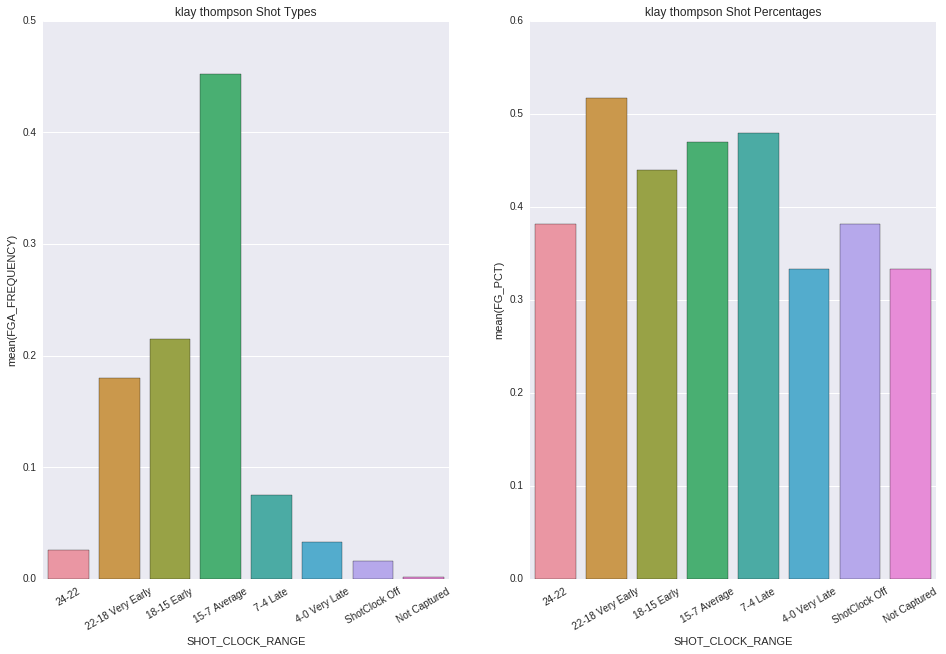

In [12]:
shotClockGraph('klay thompson')

### Draymond Green Defender Distance Shooting

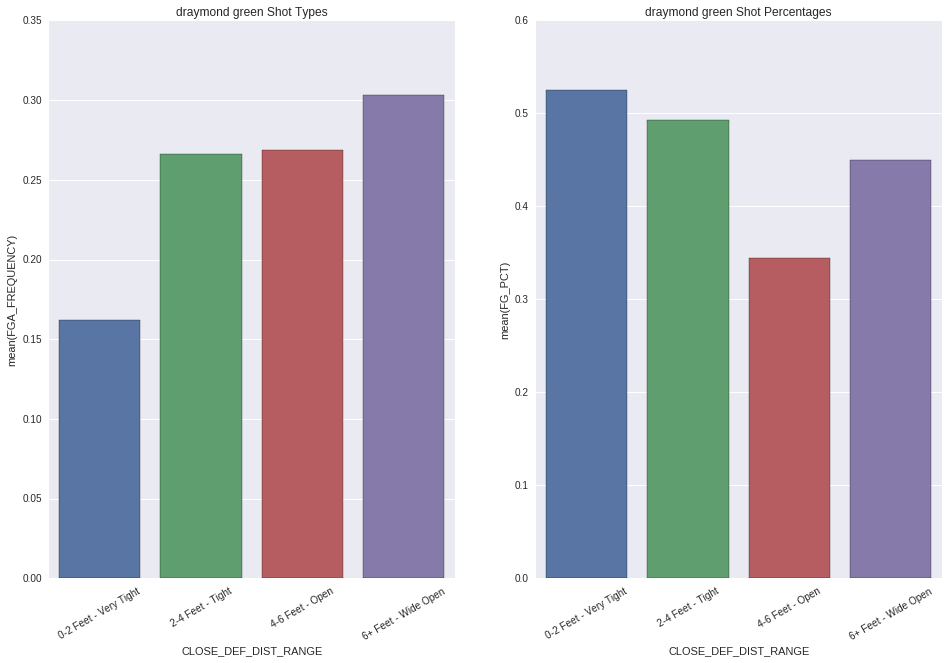

In [14]:
defenderGraph('draymond green')

### Stephen Curry Number of Dribbles Shooting

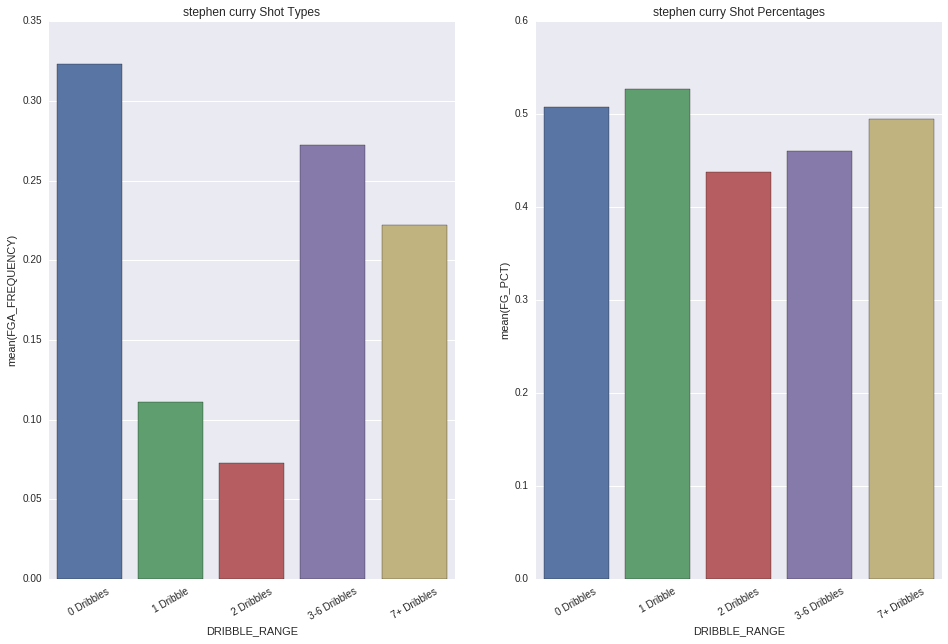

In [15]:
dribbleGraph('stephen curry')

### Tim Duncan Touch Time Shooting

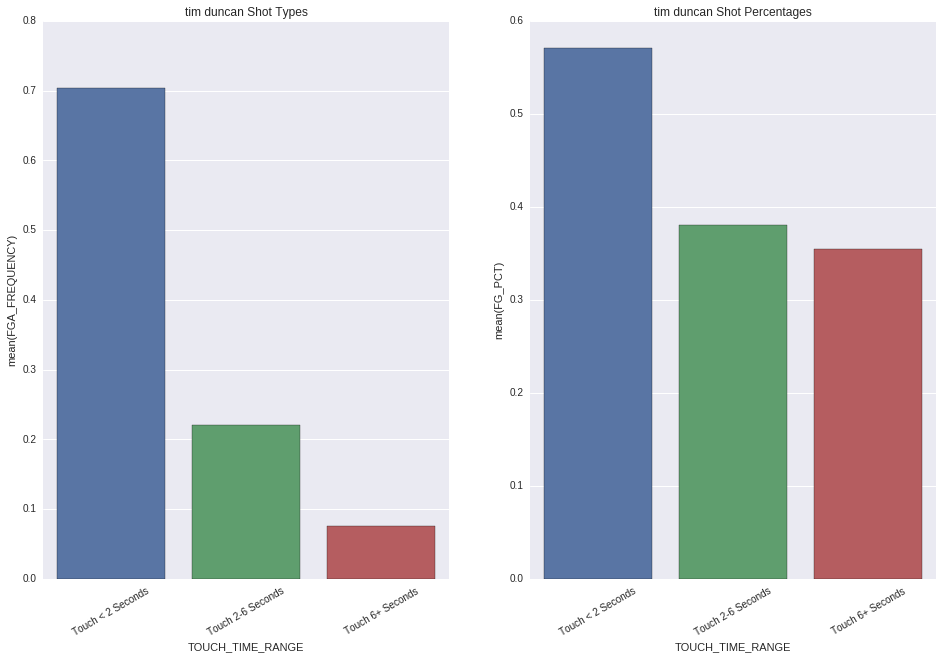

In [22]:
touchGraph('tim duncan')

_______

# How Teammates Pass

We also investigated into passing and the effectiveness of different teammates and their passing abilities. We used data about which players were passing to each other on each teams. 

In [29]:
steph_id = player.get_player("Stephen", "Curry")
steph = player.PlayerPassTracking(player_id=steph_id)
passes = steph.passes_made()
print passes
steph = player.PlayerPassTracking(player_id=steph_id, shot_clock_range=10)
passes = steph.passes_made()
print passes.AST.sum()


    PLAYER_ID PLAYER_NAME_LAST_FIRST              TEAM_NAME     TEAM_ID  \
0      201939         Curry, Stephen  Golden State Warriors  1610612744   
1      201939         Curry, Stephen  Golden State Warriors  1610612744   
2      201939         Curry, Stephen  Golden State Warriors  1610612744   
3      201939         Curry, Stephen  Golden State Warriors  1610612744   
4      201939         Curry, Stephen  Golden State Warriors  1610612744   
5      201939         Curry, Stephen  Golden State Warriors  1610612744   
6      201939         Curry, Stephen  Golden State Warriors  1610612744   
7      201939         Curry, Stephen  Golden State Warriors  1610612744   
8      201939         Curry, Stephen  Golden State Warriors  1610612744   
9      201939         Curry, Stephen  Golden State Warriors  1610612744   
10     201939         Curry, Stephen  Golden State Warriors  1610612744   
11     201939         Curry, Stephen  Golden State Warriors  1610612744   
12     201939         Cur

In [30]:
passes.PASS_TO
len(passes)
recieved = steph.passes_recieved()
steph.passes_recieved()

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,PASS_TYPE,G,PASS_FROM,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,PASS,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Green, Draymond",203110,0.340,22.43,0.80,1.91,4.18,0.458,1.06,2.04,0.521,0.85,2.14,0.398
1,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Bogut, Andrew",101106,0.203,13.41,0.83,1.68,3.06,0.547,1.01,1.88,0.540,0.66,1.19,0.558
2,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Barnes, Harrison",203084,0.116,7.64,0.44,0.78,1.56,0.496,0.49,0.75,0.650,0.29,0.81,0.354
3,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Iguodala, Andre",2738,0.082,5.41,0.45,0.71,1.60,0.445,0.29,0.65,0.442,0.43,0.95,0.447
4,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Thompson, Klay",202691,0.071,4.71,0.46,0.68,1.29,0.524,0.30,0.58,0.522,0.38,0.71,0.526
5,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Speights, Marreese",201578,0.052,3.43,0.11,0.33,0.78,0.419,0.14,0.34,0.407,0.19,0.44,0.429
6,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Lee, David",101135,0.050,3.29,0.08,0.25,0.64,0.392,0.15,0.39,0.387,0.10,0.25,0.400
7,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Livingston, Shaun",2733,0.029,1.94,0.20,0.28,0.59,0.468,0.11,0.26,0.429,0.16,0.33,0.500
8,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Ezeli, Festus",203105,0.021,1.38,0.04,0.15,0.28,0.545,0.13,0.16,0.769,0.03,0.11,0.222
9,201939,"Curry, Stephen",Golden State Warriors,1610612744,received,80,"Barbosa, Leandro",2571,0.018,1.20,0.14,0.18,0.44,0.400,0.06,0.19,0.333,0.11,0.25,0.450


This dataframe shows all of the passes Steph Curry receives and the subsequent averages about his shooting statistics. This shows how effective teammates can be together. 

In [37]:
data = player.PlayerPassTracking(player_id=steph_id).passes_made()

player_id = data.PASS_TEAMMATE_PLAYER_ID[0]
teammates = player.PlayerPassTracking(player_id=player_id).passes_recieved()
n_fga = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(steph_id)].FGA.sum()
n_fgm = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(steph_id)].FGM.sum()
n_assisted_pct = n_fgm/n_fga
t_assisted_pct = teammates.FGM.sum()/teammates.FGA.sum()
print t_assisted_pct - n_assisted_pct


# print teammates.FG_PCT[:4].dot(teammates.FGA[:4])
teammate_stat = player.PlayerCareer(player_id=player_id)
pct = teammate_stat.regular_season_totals().FG_PCT[-1:]
print float(pct - n_assisted_pct)

0.0289159108635
0.0757740585774


In [38]:
teammate_stat = player.PlayerCareer(player_id=player_id)
teammate_stat.regular_season_totals().FG_PCT[-1:]

3    0.49
Name: FG_PCT, dtype: float64

In [39]:
teammates

,PLAYER_ID,PLAYER_NAME_LAST_FIRST,TEAM_NAME,TEAM_ID,PASS_TYPE,G,PASS_FROM,PASS_TEAMMATE_PLAYER_ID,FREQUENCY,PASS,AST,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT
0,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Curry, Stephen",201939,0.381,14.73,1.71,1.80,3.75,0.480,1.20,2.14,0.562,0.59,1.61,0.370
1,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Thompson, Klay",202691,0.134,5.16,0.54,0.54,1.29,0.422,0.29,0.62,0.469,0.25,0.67,0.377
2,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Iguodala, Andre",2738,0.104,4.03,0.29,0.29,0.80,0.365,0.20,0.41,0.500,0.09,0.39,0.226
3,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Barnes, Harrison",203084,0.093,3.58,0.15,0.23,0.54,0.419,0.11,0.24,0.474,0.11,0.30,0.375
4,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Livingston, Shaun",2733,0.092,3.57,0.20,0.22,0.48,0.447,0.14,0.24,0.579,0.08,0.24,0.316
5,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Bogut, Andrew",101106,0.089,3.43,0.28,0.33,0.92,0.356,0.20,0.39,0.516,0.13,0.53,0.238
6,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Speights, Marreese",201578,0.038,1.47,0.15,0.15,0.23,0.667,0.13,0.14,0.909,0.03,0.09,0.286
7,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Barbosa, Leandro",2571,0.025,0.97,0.11,0.13,0.24,0.526,0.06,0.11,0.556,0.06,0.13,0.500
8,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Lee, David",101135,0.015,0.59,0.05,0.05,0.16,0.308,0.01,0.08,0.167,0.04,0.09,0.429
9,203110,"Green, Draymond",Golden State Warriors,1610612744,received,79,"Holiday, Justin",203200,0.013,0.52,0.03,0.04,0.10,0.375,0.01,0.04,0.333,0.03,0.06,0.400


In [56]:
def getTeammates(star_id):
    data = player.PlayerPassTracking(player_id=star_id).passes_made()
    
    for i in range(2):
        print data.PASS_TO[i]
        player_id = data.PASS_TEAMMATE_PLAYER_ID[i]
        teammates = player.PlayerPassTracking(player_id=player_id).passes_recieved()
        n_fga = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(star_id)].FGA.sum()
        n_fgm = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(star_id)].FGM.sum()
        n_assisted_pct = n_fgm/n_fga
        t_assisted_pct = teammates.FGM.sum()/teammates.FGA.sum()

        print t_assisted_pct - n_assisted_pct, "assist comparision"
        
        # print teammates.FG_PCT[:4].dot(teammates.FGA[:4])
        teammate_stat = player.PlayerCareer(player_id=player_id)
        pct = teammate_stat.regular_season_totals().FG_PCT[-1:]
        
        print float(pct - n_assisted_pct), "normal field goal"
        
        print "3"
        n_fga = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(star_id)].FG3A.sum()
        n_fgm = teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] != int(star_id)].FG3M.sum()
        if n_fgm != 0:
             n_assisted_pct = n_fgm/n_fga
        else:
             n_assisted_pct = 0
        if teammates.FG3A.sum() != 0:
            t_assisted_pct = teammates.FG3M.sum()/teammates.FG3A.sum()
        else:
            t_assisted_pct = 0
        print t_assisted_pct - n_assisted_pct, "assist comparision"
        
        # print teammates.FG_PCT[:4].dot(teammates.FGA[:4])
        teammate_stat = player.PlayerCareer(player_id=player_id)
        pct = teammate_stat.regular_season_totals().FG3_PCT[-1:]
        
        print float(pct - n_assisted_pct), "normal field goal"
        
        print teammates[teammates["PASS_TEAMMATE_PLAYER_ID"] == int(star_id)].FREQUENCY
        print    

In [57]:
getTeammates(steph_id)

Green, Draymond
0.0289159108635 assist comparision
0.0757740585774 normal field goal
3
0.0150656934307 assist comparision
0.06 normal field goal
0    0.381
Name: FREQUENCY, dtype: float64

Thompson, Klay
-0.00290673465989 assist comparision
0.000552861299709 normal field goal
3
0.00497787610619 assist comparision
-0.0125 normal field goal
0    0.292
Name: FREQUENCY, dtype: float64



This passing information shows how effective teammates are when they pass to one another and the subsequent shooting. It compares the normal shooting percentage with a percentage when assisted by a certain player. Some of these are interesting, as you would think that Steph would always make his players around him better. But because of the volume of shots that some players take, as well as not that much data, we didn't draw any meaningful conclusions from this exploration.

____
# Heat Map Shooting Charts

Shooting charts are always fun, and we wanted to visualize the different shooting abilites of certain player using a heat map. This has been done before by many sites like ESPN, but it is still an interesting exercise in data visualization. 


In [58]:
from IPython.display import IFrame

sns.set_color_codes()
sns.set_style("white")

shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID='

print shot_chart_url

http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=


In [59]:
# Get the webpage containing the data
response = requests.get(shot_chart_url)
print response
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
print headers
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

shot_df = pd.DataFrame(shots, columns=headers)
# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())

<Response [200]>
[u'GRID_TYPE', u'GAME_ID', u'GAME_EVENT_ID', u'PLAYER_ID', u'PLAYER_NAME', u'TEAM_ID', u'TEAM_NAME', u'PERIOD', u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE', u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA', u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE', u'LOC_X', u'LOC_Y', u'SHOT_ATTEMPTED_FLAG', u'SHOT_MADE_FLAG']


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,0021500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,56,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,12,31,1,1
1,Shot Chart Detail,0021500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,29,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-176,195,1,0
2,Shot Chart Detail,0021500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,9,1,0
3,Shot Chart Detail,0021500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,13,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-197,193,1,1
4,Shot Chart Detail,0021500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,8,1,1


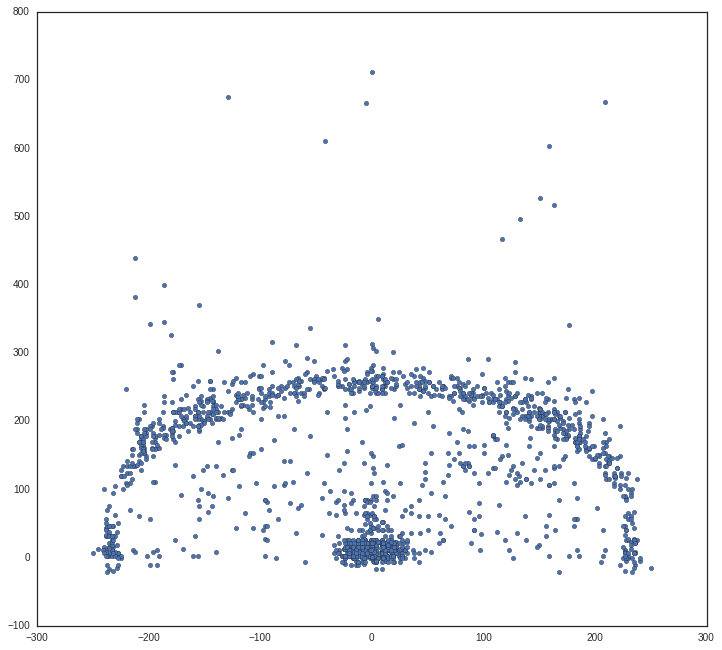

In [60]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
plt.show()

In [62]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

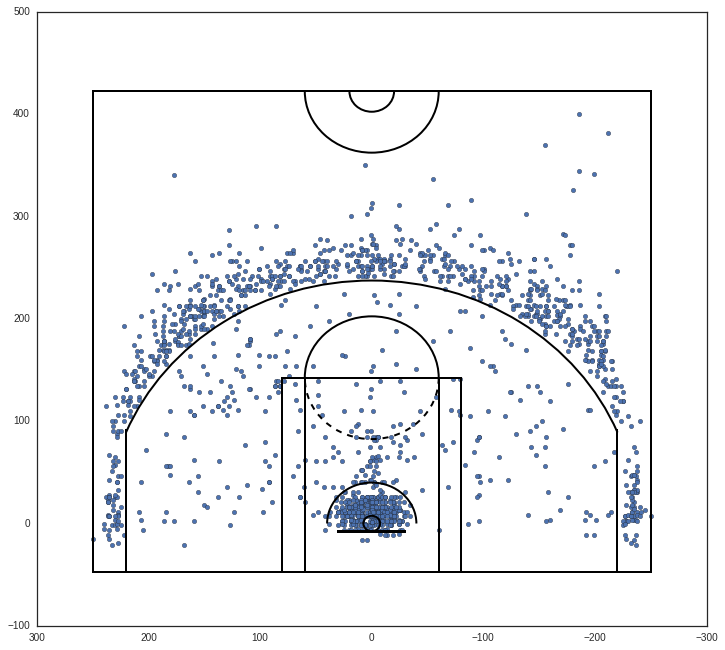

In [71]:
shot_df = shot_df[shot_df.LOC_Y < 420]
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

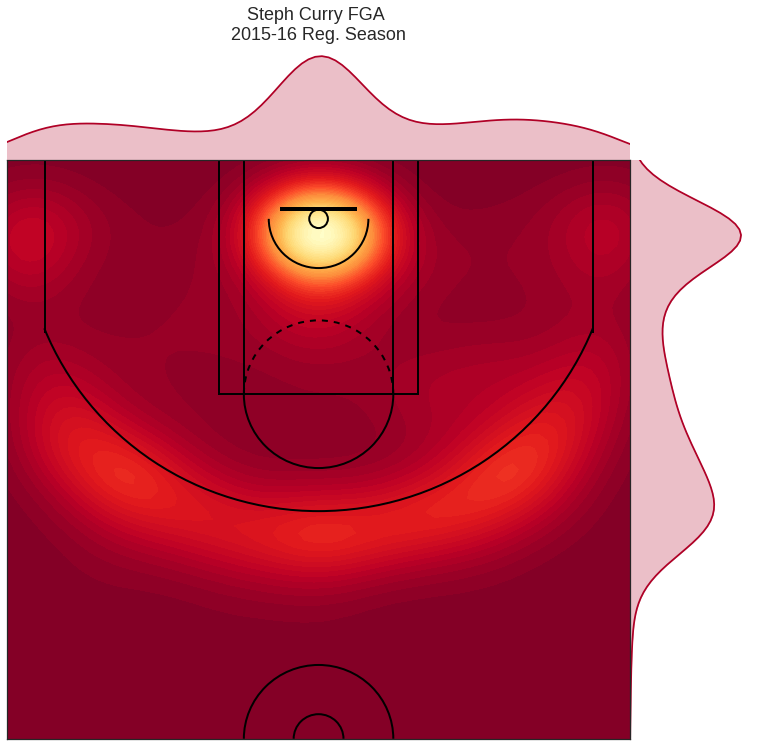

In [69]:
cmap=plt.cm.YlOrRd_r 

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Steph Curry FGA \n2015-16 Reg. Season', 
             y=1.2, fontsize=18)



For Stephen Curry, the reigning MVP, this showed how on fire he was the whole season, especially fininshing at the rim as well as aall the way around the three point arc. It also showed he favored the right corner slightly more than the left corner which was interesting. 

_____
# Exploration Conclusion

We found out that there is a lot of information about basketball out there! We found that shooting seems to have the most interesting data, which is not surprising. We weren't particularily impressed by looking at defense or passing information, as it didn't tell a story that we liked very much. We decided to move forward with player shooting 